In [36]:
import pandas as pd
import numpy as np

In [37]:
df = pd.read_csv('yelp.csv')

In [38]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [39]:
df['fault'] = df['useful']

# Iterate over the rows of the DataFrame
for index, row in df.iterrows():
    # Access the columns of the current row
    if row['useful'] < 2:
      df.loc[index, 'fault'] = 1
    else:
      df.loc[index, 'fault'] = 0

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
 10  fault        10000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 859.5+ KB


In [41]:
df = df.drop(['business_id', 'date', 'review_id', 'type', 'cool', 'useful', 'funny', 'user_id', 'stars'], axis = 1)

In [42]:
df.head()

,text,fault
0,My wife took me here on my birthday for breakf...,0
1,I have no idea why some people give bad review...,1
2,love the gyro plate. Rice is so good and I als...,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",0
4,General Manager Scott Petello is a good egg!!!...,1


In [43]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define the preprocessing function
def preprocess(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    
    return text

# Apply the preprocessing function to the review column
nltk.download('stopwords')
nltk.download('wordnet')
df['text'] = df['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [82]:
df.head()

,text,fault
0,wife took birthday breakfast excellent weather...,0
1,idea people give bad review place go show plea...,1
2,love gyro plate rice good also dig candy selec...,1
3,rosie dakota love chaparral dog park convenien...,0
4,general manager scott petello good egg go deta...,1


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer with desired parameters
vectorizer = TfidfVectorizer(max_features=1000)

# Fit the vectorizer to the preprocessed text data
text_features = vectorizer.fit_transform(df['text'])

# Get the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Create a new DataFrame with the text features and labels
features_df = pd.DataFrame(text_features.toarray(), columns=feature_names)
fault_df = pd.DataFrame(df['fault'].apply(lambda x: 'fault' if x == 0 else 'no fault'), columns=['fault'])
df_transformed = pd.concat([features_df, fault_df], axis=1)

In [88]:
df_transformed

,able,absolutely,across,actually,add,added,addition,afternoon,ago,agree,...,yeah,year,yelp,yes,yet,yogurt,young,yum,yummy,fault
0,0.0,0.136164,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,fault
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,no fault
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,no fault
3,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,fault
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,no fault
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,fault
9996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.134093,0.0,0.0,0.0,0.0,no fault
9997,0.0,0.000000,0.089957,0.0,0.0,0.0,0.0,0.0,0.084725,0.0,...,0.0,0.06385,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,no fault
9998,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,no fault


Multinomial Naive Bayes:
	Accuracy: 0.7135
	Recall: 1.0000
	Precision: 0.7128
	F1: 0.8323
Logistic Regression:
	Accuracy: 0.7105
	Recall: 0.9198
	Precision: 0.7377
	F1: 0.8188
Random Forest:
	Accuracy: 0.7145
	Recall: 0.9578
	Precision: 0.7272
	F1: 0.8267


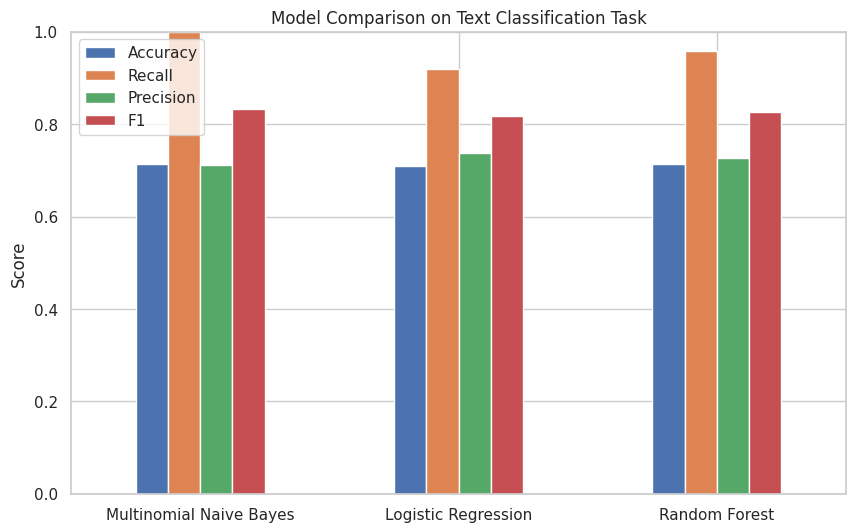

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_transformed.drop('fault', axis=1), df_transformed['fault'], test_size=0.2, random_state=42)

# Define a function to train and evaluate a model
def train_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, pos_label='no fault')
    precision = precision_score(y_test, y_pred, pos_label='no fault')
    f1 = f1_score(y_test, y_pred, pos_label='no fault')

    return accuracy, recall, precision, f1

# Define the models to evaluate
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    accuracy, recall, precision, f1 = train_and_evaluate(model)
    results[name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    }

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"\t{metric}: {value:.4f}")
        
# Plot the results
sns.set(style="whitegrid")
metrics_df = pd.DataFrame.from_dict(results, orient='index')
metrics_df.plot(kind='bar', rot=0, figsize=(10,6))
plt.title("Model Comparison on Text Classification Task")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.show()


In [91]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import MultinomialNB

# Define a function to preprocess the text
def preprocess_text(text):
    # Add your preprocessing code here# Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text

# Load some real-life reviews
reviews = [
    "This is a great product! It works really well and I would definitely recommend it to others.",
]

# Preprocess the reviews
preprocessed_reviews = [preprocess_text(review) for review in reviews]

# Vectorize the preprocessed reviews
X_test = vectorizer.transform(preprocessed_reviews)
# Make predictions on the reviews
y_pred = model.predict(X_test)

# Print the predictions
for review, prediction in zip(reviews, y_pred):
    if prediction == "fault":
        print(f"Review: {review}\nPrediction: This review is a fault.\n")
    else:
        print(f"Review: {review}\nPrediction: This review is not a fault.\n")


Review: This is a great product! It works really well and I would definitely recommend it to others.
Prediction: This review is not a fault.

